## Introduksjon til Konfidensintervall

Konfidensintervaller er et grunnleggende verktøy i statistisk inferens, brukt for å estimere usikkerheten rundt en populasjonsparameter som middel eller andel. Dette intervallet gir et spekter av plausible verdier for parameteren og er definert av et øvre og nedre konfidensgrense.


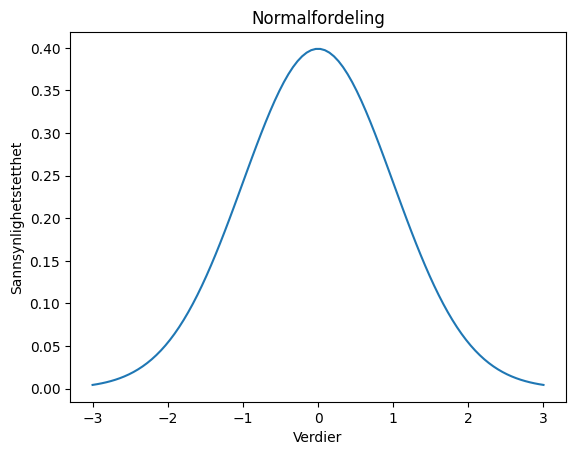

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Viser en normalfordeling
mu = 0  # middelverdi
sigma = 1  # standardavvik
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Normalfordeling')
plt.xlabel('Verdier')
plt.ylabel('Sannsynlighetstetthet')
plt.show()


## Konfidensintervall for Populasjonsmiddelverdi med Kjent Varians

Når variansen er kjent, bruker vi Z-score for å beregne konfidensintervaller.


In [43]:
# Beregning av 95% konfidensintervall for en normalfordeling
z_critical = stats.norm.ppf(0.975)  # 97.5% percentile for two-sided 95% confidence
margin_of_error = z_critical * (sigma / np.sqrt(30))  # for n=30 observations
confidence_interval = (mu - margin_of_error, mu + margin_of_error)
print("95% konfidensintervall:", confidence_interval)


95% konfidensintervall: (-0.35783882874343137, 0.35783882874343137)


## Eksempel på Beregning og Visualisering av Konfidensintervall


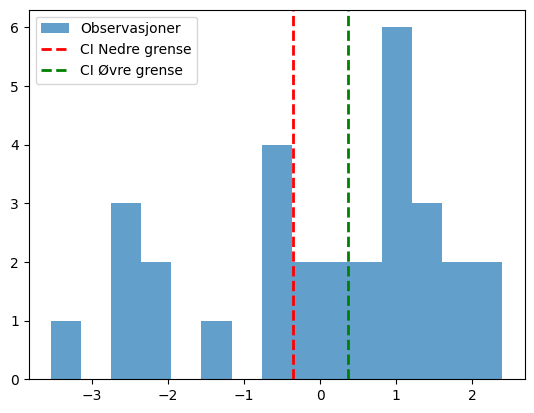

In [52]:
# Genererer tilfeldige data
data = np.random.normal(mu, sigma, 30)
ci_lower = np.mean(data) - margin_of_error
ci_upper = np.mean(data) + margin_of_error

# Visualisering
plt.hist(data, bins=15, alpha=0.7, label='Observasjoner')
plt.axvline(ci_lower, color='red', linestyle='dashed', linewidth=2, label='CI Nedre grense')
plt.axvline(ci_upper, color='green', linestyle='dashed', linewidth=2, label='CI Øvre grense')
plt.legend()
plt.show()


## Hvordan Tolke et Konfidensintervall

Et 95% konfidensintervall betyr at hvis vi gjentar studien mange ganger, vil omtrent 95% av konfidensintervallene inneholde den sanne populasjonsparameteren.


## Konfidensintervall for Enkeltproporsjoner

Beregning av konfidensintervall for andeler, slik som prosentandelen av en spesifikk respons i en befolkningsgruppe.


In [53]:
# Beregner konfidensintervall for en proporsjon
proporsjon = 0.6  # f.eks. 60% av deltakerne foretrakk et produkt
n = 100  # antall deltakere
z = stats.norm.ppf(0.975)  # 95% konfidens
se_prop = np.sqrt((proporsjon * (1 - proporsjon)) / n)

ci_prop_lower = proporsjon - z * se_prop
ci_prop_upper = proporsjon + z * se_prop

print(f"95% Konfidensintervall for proporsjon: ({ci_prop_lower:.3f}, {ci_prop_upper:.3f})")


95% Konfidensintervall for proporsjon: (0.504, 0.696)


## Bootstrap Metoder for Konfidensintervall

Bootstrap metoder anvendes for å beregne konfidensintervaller uten å anta en spesifikk fordeling av data, noe som er nyttig for skjevfordelte datasett.


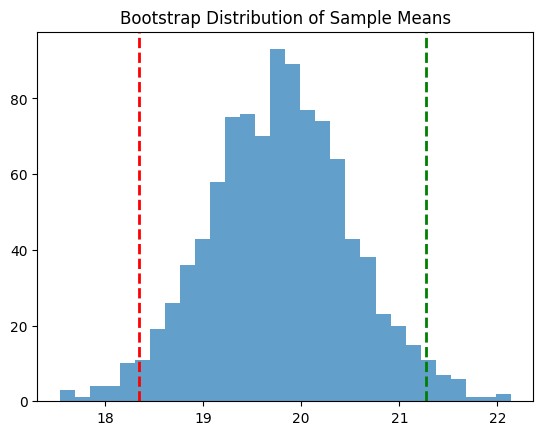

95% Bootstrap konfidensintervall: (18.348, 21.274)


In [58]:
# Simulering av bootstrap for å estimere konfidensintervall
data = np.random.normal(loc=20, scale=5, size=30)  # generer noen data
boot_means = np.array([np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(1000)])
ci_boot_lower = np.percentile(boot_means, 2.5)
ci_boot_upper = np.percentile(boot_means, 97.5)

plt.hist(boot_means, bins=30, alpha=0.7)
plt.axvline(ci_boot_lower, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci_boot_upper, color='green', linestyle='dashed', linewidth=2)
plt.title('Bootstrap Distribution of Sample Means')
plt.show()

print(f"95% Bootstrap konfidensintervall: ({ci_boot_lower:.3f}, {ci_boot_upper:.3f})")


## Konfidensintervaller i Medisinsk Forskning

Konfidensintervaller er avgjørende i medisinsk forskning for å estimere usikkerheten rundt effekten av behandlinger. De hjelper forskere med å forstå hvor sikre de kan være på resultater oppnådd fra kliniske studier.


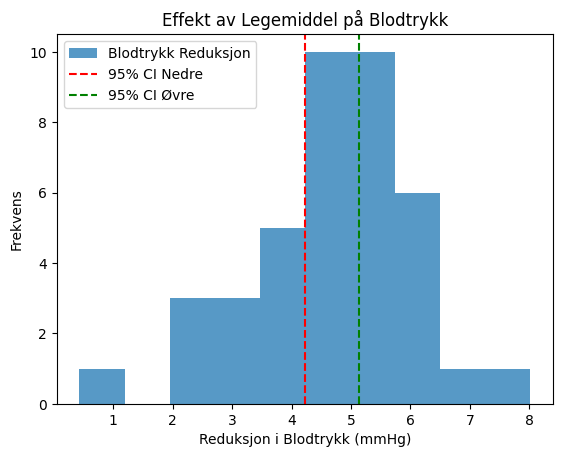

95% Konfidensintervall for gjennomsnittlig reduksjon i blodtrykk: (4.23, 5.13) mmHg


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Anta en studie på effekten av et nytt legemiddel på blodtrykk med et utvalg på 40 pasienter
blodtrykk_reduksjon = np.random.normal(loc=5, scale=1.5, size=40)  # gjennomsnittlig reduksjon er 5 mmHg, SD er 1.5
gjennomsnitt = np.mean(blodtrykk_reduksjon)
standardavvik = np.std(blodtrykk_reduksjon, ddof=1)
se = standardavvik / np.sqrt(len(blodtrykk_reduksjon))  # Standard Error

# Beregn 95% konfidensintervall
t_critical = t.ppf(0.975, df=len(blodtrykk_reduksjon)-1)  # t-verdi for 95% CI
ci_lower = gjennomsnitt - t_critical * se
ci_upper = gjennomsnitt + t_critical * se

plt.hist(blodtrykk_reduksjon, bins=10, alpha=0.75, label='Blodtrykk Reduksjon')
plt.axvline(ci_lower, color='red', linestyle='dashed', label='95% CI Nedre')
plt.axvline(ci_upper, color='green', linestyle='dashed', label='95% CI Øvre')
plt.xlabel('Reduksjon i Blodtrykk (mmHg)')
plt.ylabel('Frekvens')
plt.title('Effekt av Legemiddel på Blodtrykk')
plt.legend()
plt.show()

print(f"95% Konfidensintervall for gjennomsnittlig reduksjon i blodtrykk: ({ci_lower:.2f}, {ci_upper:.2f}) mmHg")


## Håndtering av Skjeve Data og Utfordringer Med Små Utvalgsstørrelser

Skjeve data og små utvalgsstørrelser kan føre til misvisende konfidensintervaller. Bootstrapping kan hjelpe til med å adressere disse utfordringene ved å gi mer robuste estimater.


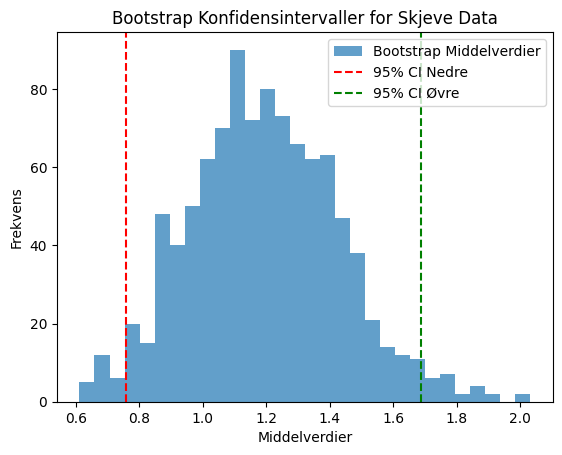

95% Bootstrap konfidensintervall fra skjeve data: (0.76, 1.69)


In [88]:
# Simulerer skjeve data: Log-normal fordeling kan representere mange biomedisinske målinger
skjev_data = np.random.lognormal(mean=0, sigma=1, size=30)
gjennomsnitt = np.mean(skjev_data)
bootstrap_means = [np.mean(np.random.choice(skjev_data, size=len(skjev_data), replace=True)) for _ in range(1000)]

# Beregn 95% bootstrap konfidensintervall
ci_boot_lower = np.percentile(bootstrap_means, 2.5)
ci_boot_upper = np.percentile(bootstrap_means, 97.5)

plt.hist(bootstrap_means, bins=30, alpha=0.7, label='Bootstrap Middelverdier')
plt.axvline(ci_boot_lower, color='red', linestyle='dashed', label='95% CI Nedre')
plt.axvline(ci_boot_upper, color='green', linestyle='dashed', label='95% CI Øvre')
plt.xlabel('Middelverdier')
plt.ylabel('Frekvens')
plt.title('Bootstrap Konfidensintervaller for Skjeve Data')
plt.legend()
plt.show()

print(f"95% Bootstrap konfidensintervall fra skjeve data: ({ci_boot_lower:.2f}, {ci_boot_upper:.2f})")
